In [ ]:
#Overall training dynamics of ISNetDANN
#best-performin model of No Finding - Sex: e71e3c622a942657993e10cf0b5e652b
#hparams seed: 8, seed: 2

In [1]:
import pandas as pd
import json



In [3]:
import pandas as pd

path = "/home/lchanch/model_training/ISNetDANN/train/grid_sex_ISNetDANN_hp8_final/e71e3c622a942657993e10cf0b5e652b/results.json"

df = pd.read_json(path, lines=True)


In [4]:
df.shape
df.columns


Index(['P', 'args', 'cLoss', 'epoch', 'gen_loss', 'hLoss', 'hparams',
       'isnet_loss', 'mem_gb', 'step', 'step_time', 'te', 'te_avg_acc',
       'te_overall_auroc', 'te_worst_acc', 'va', 'va_avg_acc',
       'va_overall_auroc', 'va_worst_acc', 'disc_acc', 'disc_loss'],
      dtype='object')

In [5]:
df.head(1)

,P,args,cLoss,epoch,gen_loss,hLoss,hparams,isnet_loss,mem_gb,step,...,te,te_avg_acc,te_overall_auroc,te_worst_acc,va,va_avg_acc,va_overall_auroc,va_worst_acc,disc_acc,disc_loss
0,0.05,"{'algorithm': 'ISNetDANN', 'attr': 'sex', 'aug...",0.682425,0,-4.396562,3.929081,"{'A': 1, 'B': 1, 'Ea': 1, 'P': None, 'Zb': 1, ...",0.844758,22.684003,0,...,"{'max_attr': {'AUPRC': 0.41535974460801806, 'A...",0.566602,0.581404,0.536195,"{'max_attr': {'AUPRC': 0.406990089617259, 'AUR...",0.551448,0.564897,0.499603,NaN,NaN


In [ ]:
#plot

In [20]:
import matplotlib.pyplot as plt

def plot_from_df(
    df,
    x,
    y,
    xlabel=None,
    ylabel=None,
    title=None,
    legend=True,
    grid=True,
    figsize=(8, 5)
):
    """
    df: pandas DataFrame
    x: str (columna para eje X)
    y: str o list[str] (una o varias columnas para eje Y)
    """

    # Asegurar que y sea lista
    if isinstance(y, str):
        y = [y]

    plt.figure(figsize=figsize)

    for col in y:
        plt.plot(df[x], df[col], label=col)

    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else ", ".join(y))
    plt.title(title if title else f"{' vs '.join(y)} vs {x}")

    if legend and len(y) > 1:
        plt.legend()

    if grid:
        plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
#======Losses============

In [31]:
df_losses=df[['step', 'epoch','P','cLoss', 'hLoss', 'isnet_loss', 'disc_loss', 'gen_loss']]
df_losses

,step,epoch,P,cLoss,hLoss,isnet_loss,disc_loss,gen_loss
0,0,0,0.050000,0.682425,3.929081,0.844758,NaN,-4.396562
1,1000,0,0.061690,0.564443,4.037937,0.766526,0.699965,-4.105244
2,2000,0,0.085023,0.504849,1.595479,0.595883,0.693885,-4.230825
3,3000,0,0.108357,0.502207,0.997153,0.555227,0.691376,-4.260869
4,4000,0,0.131690,0.495464,0.789556,0.533917,0.691735,-4.273414
5,5000,1,0.155023,0.495438,0.687673,0.525181,0.691214,-4.281216
6,6000,1,0.178357,0.495871,0.605010,0.515168,0.690897,-4.289731
7,7000,1,0.201690,0.488279,0.503856,0.490956,0.690618,-4.310684
8,8000,1,0.225023,0.489505,0.490693,0.490141,0.689921,-4.312275
9,9000,2,0.248357,0.492734,0.355543,0.458506,0.689530,-4.345072


In [39]:
df_losses = df_losses.iloc[1:].reset_index(drop=True)

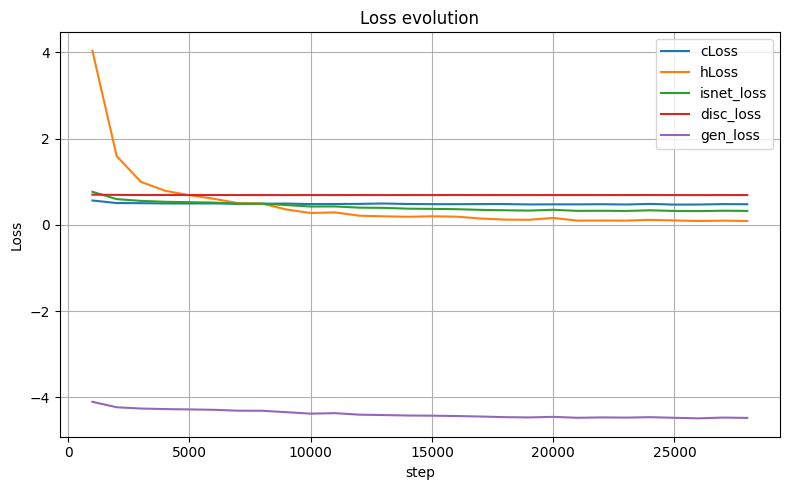

In [36]:
plot_from_df(
    df_losses,
    x="step",
    y=["cLoss", "hLoss", "isnet_loss", "disc_loss", "gen_loss"],
    title="Loss evolution",
    ylabel="Loss"
)


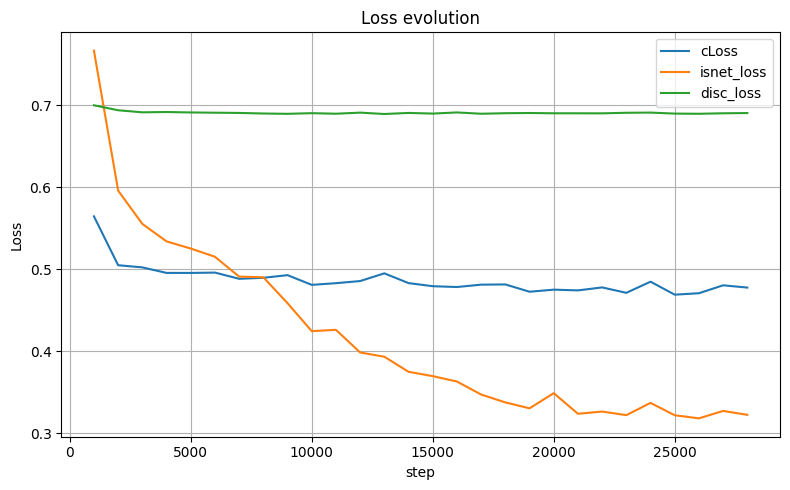

In [37]:
plot_from_df(
    df_losses,
    x="step",
    y=["cLoss", "isnet_loss", "disc_loss"],
    title="Loss evolution",
    ylabel="Loss"
)


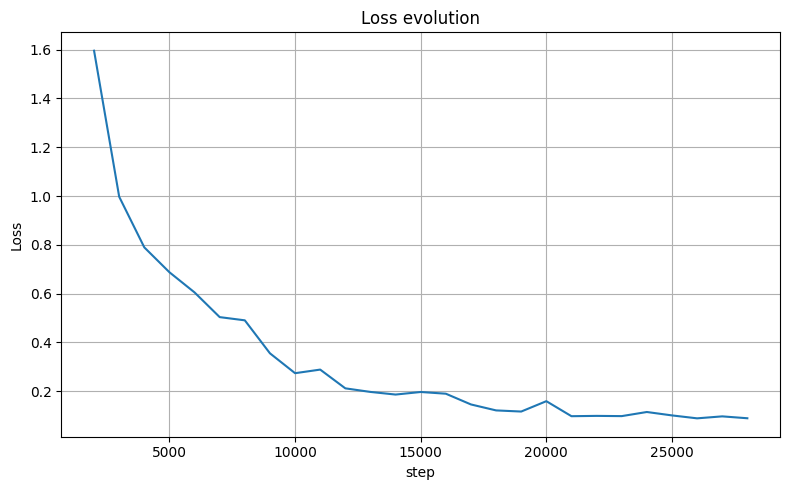

In [54]:
plot_from_df(
    df_losses,
    x="step",
    y=["hLoss"],
    title="Loss evolution",
    ylabel="Loss"
)


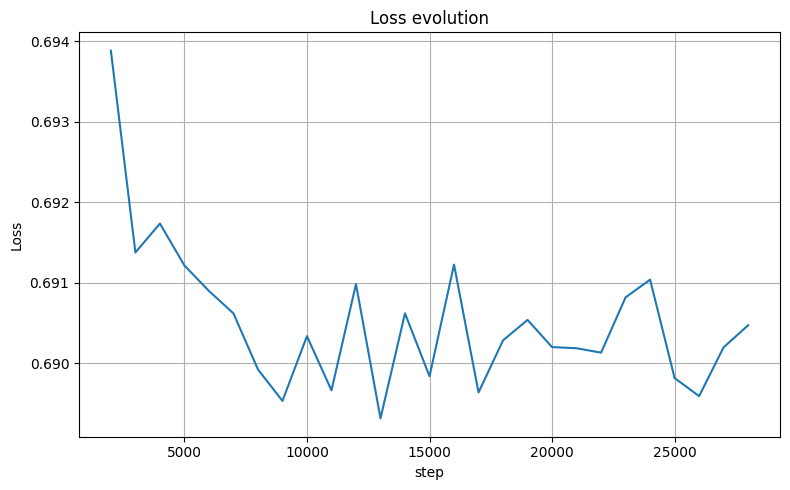

In [56]:
plot_from_df(
    df_losses,
    x="step",
    y=["disc_loss"],
    title="Loss evolution",
    ylabel="Loss"
)


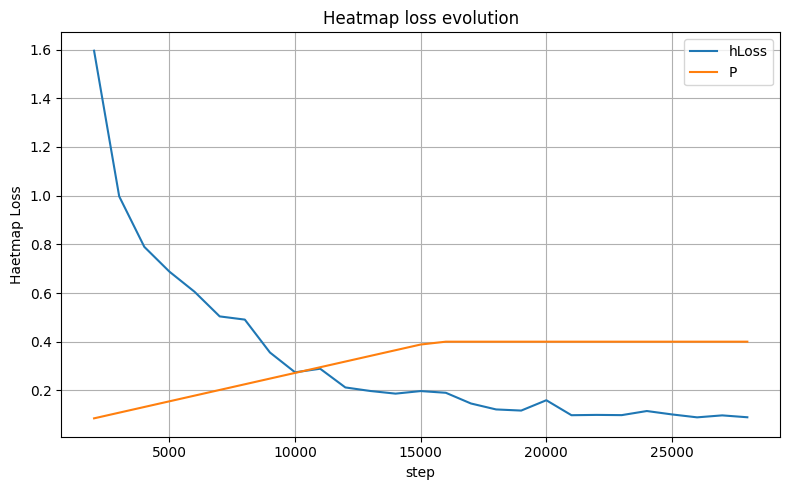

In [57]:
plot_from_df(
    df_losses,
    x="step",
    y=["hLoss", "P"],
    title="Heatmap loss evolution",
    ylabel="Haetmap Loss"
)


In [ ]:
#======Losses========

In [ ]:
#=======performance metrics ===============

In [ ]:
#----AUROC

In [17]:
overall_auroc_te = df["te"].apply(lambda x: x["overall"]["AUROC"])
overall_auroc_va = df["va"].apply(lambda x: x["overall"]["AUROC"])

df_overall_auroc = pd.DataFrame({
    "step": df["step"],
    "epoch": df["epoch"],
    "overall_AUROC_te": overall_auroc_te,
    "overall_AUROC_va": overall_auroc_va
})

df_overall_auroc

,step,epoch,overall_AUROC_te,overall_AUROC_va
0,0,0,0.581404,0.564897
1,1000,0,0.792327,0.788077
2,2000,0,0.804290,0.801293
3,3000,0,0.810369,0.808673
4,4000,0,0.814160,0.811426
5,5000,1,0.818987,0.815388
6,6000,1,0.817563,0.814862
7,7000,1,0.819359,0.815982
8,8000,1,0.820569,0.818990
9,9000,2,0.821604,0.818247


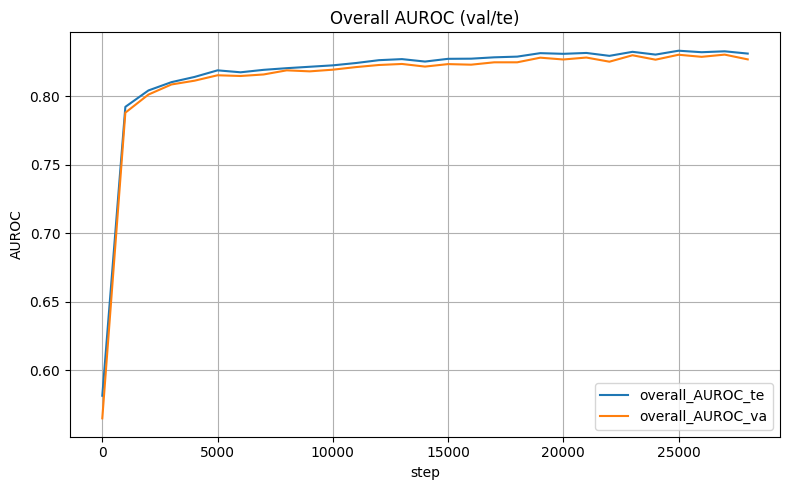

In [21]:
plot_from_df(
    df_overall_auroc,
    x="step",
    y=["overall_AUROC_te", "overall_AUROC_va"],
    title="Overall AUROC (val/te)",
    ylabel="AUROC"
)


In [ ]:
#---Balanced Acc

In [23]:
balan_acc_te_50 = df["te"].apply(lambda x: x["overall"]["balanced_acc_50"])
balan_acc_va_50 = df["va"].apply(lambda x: x["overall"]["balanced_acc_50"])

df_balan_acc_50 = pd.DataFrame({
    "step": df["step"],
    "epoch": df["epoch"],
    "balan_acc_te_50": balan_acc_te_50,
    "balan_acc_va_50": balan_acc_va_50
})

df_balan_acc_50 

,step,epoch,balan_acc_te_50,balan_acc_va_50
0,0,0,0.559000,0.545245
1,1000,0,0.695783,0.691143
2,2000,0,0.720610,0.716514
3,3000,0,0.726250,0.719988
4,4000,0,0.743529,0.735658
5,5000,1,0.752944,0.746255
6,6000,1,0.721802,0.718591
7,7000,1,0.753090,0.745799
8,8000,1,0.739607,0.732980
9,9000,2,0.758090,0.749132


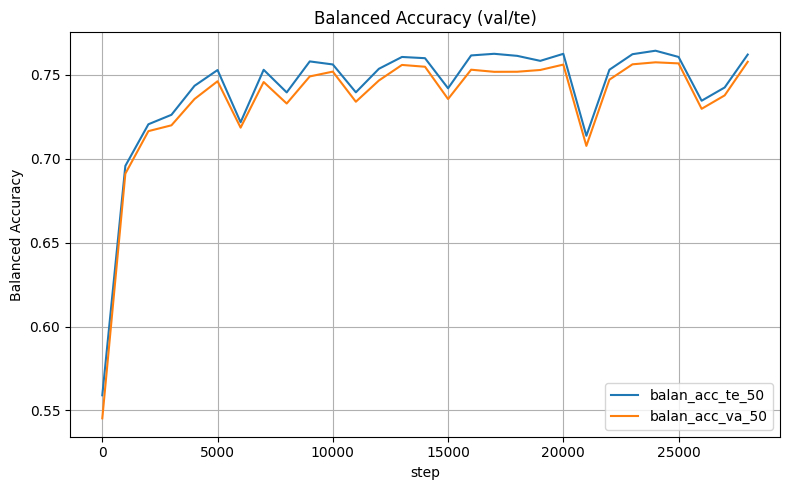

In [24]:
plot_from_df(
    df_balan_acc_50 ,
    x="step",
    y=["balan_acc_te_50", "balan_acc_va_50"],
    title="Balanced Accuracy (val/te)",
    ylabel="Balanced Accuracy"
)


In [ ]:
#=======performance metrics ===============

In [ ]:
#======== FNR ===============

In [40]:
fpr_te_overall_50 = df["te"].apply(
    lambda x: x["overall"]["FPR_50"]
)

fpr_te_attr_0_50 = df["te"].apply(
    lambda x: x["per_attribute"]["0"]["FPR_50"]
)

fpr_te_attr_1_50 = df["te"].apply(
    lambda x: x["per_attribute"]["1"]["FPR_50"]
)

df_te_FPR = pd.DataFrame({
    "step": df["step"],
    "epoch": df["epoch"],
    "fpr_te_overall_50": fpr_te_overall_50 ,
    "fpr_te_attr_0_50": fpr_te_attr_0_50,
    "fpr_te_attr_1_50": fpr_te_attr_1_50
})

df_te_FPR

,step,epoch,fpr_te_overall_50,fpr_te_attr_0_50,fpr_te_attr_1_50
0,0,0,0.419192,0.432919,0.408516
1,1000,0,0.100778,0.101113,0.100517
2,2000,0,0.130744,0.125654,0.134702
3,3000,0,0.131221,0.130017,0.132157
4,4000,0,0.165911,0.162849,0.168292
5,5000,1,0.273131,0.266252,0.278480
6,6000,1,0.114234,0.114311,0.114174
7,7000,1,0.177411,0.186846,0.170074
8,8000,1,0.139476,0.140380,0.138773
9,9000,2,0.211767,0.220877,0.204682


In [42]:
df_te_FPR.describe()

,step,epoch,fpr_te_overall_50,fpr_te_attr_0_50,fpr_te_attr_1_50
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,14000.000000,2.689655,0.176545,0.181772,0.172481
std,8514.693183,1.910562,0.067396,0.067822,0.067687
min,0.000000,0.000000,0.079878,0.092059,0.070405
25%,7000.000000,1.000000,0.130744,0.134708,0.132157
50%,14000.000000,3.000000,0.165911,0.175175,0.165154
75%,21000.000000,4.000000,0.211767,0.220877,0.203495
max,28000.000000,6.000000,0.419192,0.432919,0.408516


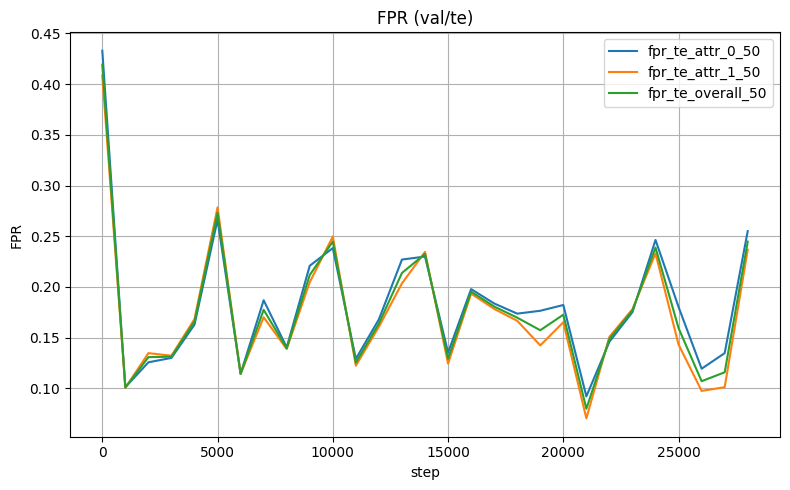

In [41]:
plot_from_df(
    df_te_FPR,
    x="step",
    y=["fpr_te_attr_0_50", "fpr_te_attr_1_50", "fpr_te_overall_50"],
    title="FPR (val/te)",
    ylabel="FPR"
)


In [ ]:
#============FNR=============

In [ ]:
#======================ERM=========================

In [43]:
erm_path = "/home/lchanch/initial_training/output_sweep_12/grid_sex_mimic_12/8567bca8c4876916928b7465a52cdeae/results.json" #hparams_seed=1
erm_df = pd.read_json(erm_path, lines=True)


In [45]:
erm_df.head(1)

,args,epoch,hparams,loss,mem_gb,step,step_time,te,te_avg_acc,te_overall_auroc,te_worst_acc,va,va_avg_acc,va_overall_auroc,va_worst_acc
0,"{'algorithm': 'ERM', 'attr': 'sex', 'aug': 'ba...",0.0,"{'attr': 'sex', 'attr_balanced': False, 'batch...",0.733081,10.230681,0,1.05637,"{'max_attr': {'AUPRC': 0.49650860023666105, 'A...",0.630443,0.625047,0.0,"{'max_attr': {'AUPRC': 0.49906718524178406, 'A...",0.632203,0.628129,0.0


In [46]:
overall_auroc_te_erm = erm_df["te"].apply(lambda x: x["overall"]["AUROC"])
overall_auroc_va_erm = erm_df["va"].apply(lambda x: x["overall"]["AUROC"])

df_overall_auroc_erm = pd.DataFrame({
    "step": erm_df["step"],
    "epoch": erm_df["epoch"],
    "overall_AUROC_te": overall_auroc_te_erm,
    "overall_AUROC_va": overall_auroc_va_erm
})

df_overall_auroc_erm

,step,epoch,overall_AUROC_te,overall_AUROC_va
0,0,0.000000,0.625047,0.628129
1,1000,0.293768,0.823315,0.820951
2,2000,0.587536,0.833450,0.829972
3,3000,0.881304,0.834176,0.831857
4,4000,1.175072,0.836643,0.833936
5,5000,1.468840,0.837535,0.833612
6,6000,1.762608,0.838982,0.836505
7,7000,2.056376,0.842425,0.839258
8,8000,2.350144,0.839162,0.836607
9,9000,2.643912,0.842459,0.839002


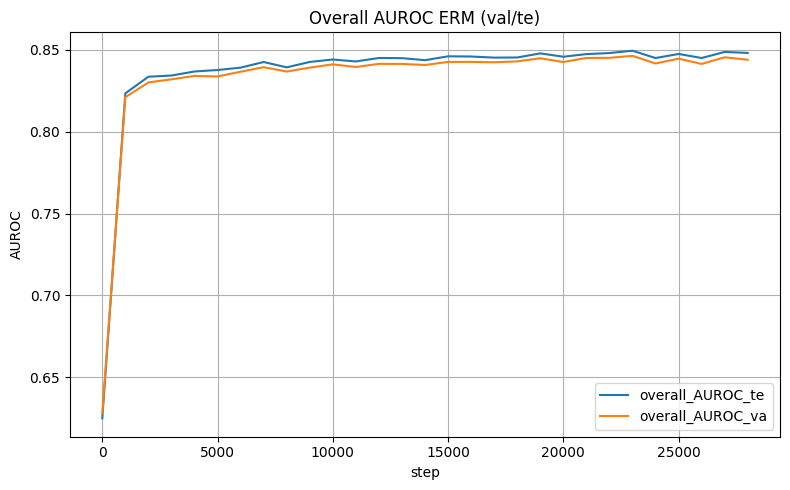

In [47]:
plot_from_df(
    df_overall_auroc_erm,
    x="step",
    y=["overall_AUROC_te", "overall_AUROC_va"],
    title="Overall AUROC ERM (val/te)",
    ylabel="AUROC"
)


In [48]:
df_losses_erm=erm_df[['step', 'epoch','loss']]
df_losses_erm

,step,epoch,loss
0,0,0.000000,0.733081
1,1000,0.293768,0.523418
2,2000,0.587536,0.500114
3,3000,0.881304,0.496657
4,4000,1.175072,0.491611
5,5000,1.468840,0.486912
6,6000,1.762608,0.486048
7,7000,2.056376,0.482455
8,8000,2.350144,0.480576
9,9000,2.643912,0.478575


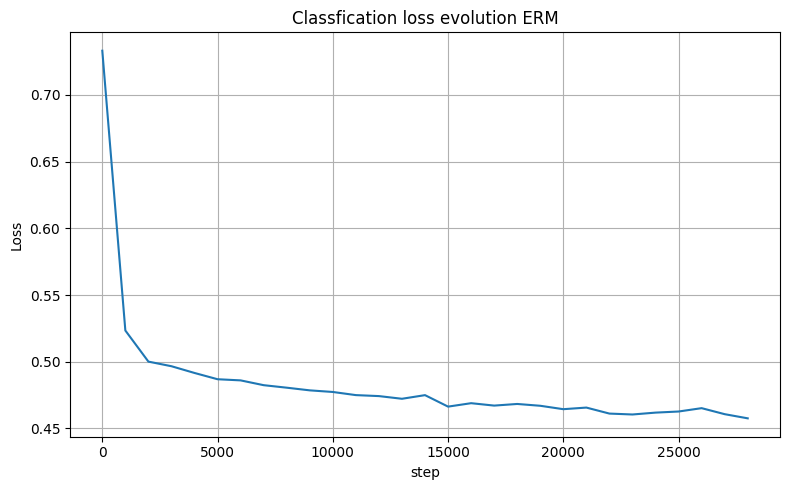

In [49]:
plot_from_df(
    df_losses_erm,
    x="step",
    y=["loss"],
    title="Classfication loss evolution ERM",
    ylabel="Loss"
)


In [50]:
balan_acc_te_50_erm = erm_df["te"].apply(lambda x: x["overall"]["balanced_acc_50"])
balan_acc_va_50_erm = erm_df["va"].apply(lambda x: x["overall"]["balanced_acc_50"])

df_balan_acc_50_erm = pd.DataFrame({
    "step": erm_df["step"],
    "epoch": erm_df["epoch"],
    "balan_acc_te_50": balan_acc_te_50_erm,
    "balan_acc_va_50": balan_acc_va_50_erm
})

df_balan_acc_50_erm

,step,epoch,balan_acc_te_50,balan_acc_va_50
0,0,0.000000,0.500053,0.500012
1,1000,0.293768,0.752346,0.749251
2,2000,0.587536,0.763434,0.759871
3,3000,0.881304,0.761478,0.761670
4,4000,1.175072,0.757569,0.755291
5,5000,1.468840,0.745924,0.743114
6,6000,1.762608,0.744399,0.741240
7,7000,2.056376,0.758218,0.757823
8,8000,2.350144,0.763093,0.761105
9,9000,2.643912,0.770017,0.766381


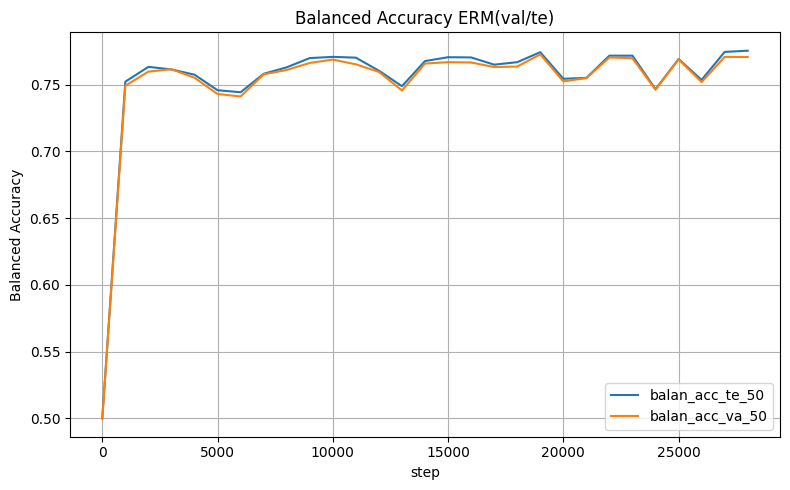

In [51]:
plot_from_df(
    df_balan_acc_50_erm,
    x="step",
    y=["balan_acc_te_50", "balan_acc_va_50"],
    title="Balanced Accuracy ERM(val/te)",
    ylabel="Balanced Accuracy"
)


In [52]:
fpr_te_overall_50_erm = erm_df["te"].apply(
    lambda x: x["overall"]["FPR_50"]
)

fpr_te_attr_0_50_erm = erm_df["te"].apply(
    lambda x: x["per_attribute"]["0"]["FPR_50"]
)

fpr_te_attr_1_50_erm = erm_df["te"].apply(
    lambda x: x["per_attribute"]["1"]["FPR_50"]
)

df_te_FPR_erm = pd.DataFrame({
    "step": erm_df["step"],
    "epoch": erm_df["epoch"],
    "fpr_te_overall_50": fpr_te_overall_50_erm,
    "fpr_te_attr_0_50": fpr_te_attr_0_50_erm,
    "fpr_te_attr_1_50": fpr_te_attr_1_50_erm
})

df_te_FPR_erm

,step,epoch,fpr_te_overall_50,fpr_te_attr_0_50,fpr_te_attr_1_50
0,0,0.000000,0.000068,0.000000,0.000125
1,1000,0.293768,0.300584,0.306190,0.295841
2,2000,0.587536,0.240501,0.259396,0.224515
3,3000,0.881304,0.253977,0.264628,0.244965
4,4000,1.175072,0.179067,0.185777,0.173390
5,5000,1.468840,0.143132,0.161975,0.127190
6,6000,1.762608,0.129015,0.144657,0.115780
7,7000,2.056376,0.155358,0.168312,0.144398
8,8000,2.350144,0.200108,0.215254,0.187293
9,9000,2.643912,0.229525,0.251216,0.211173


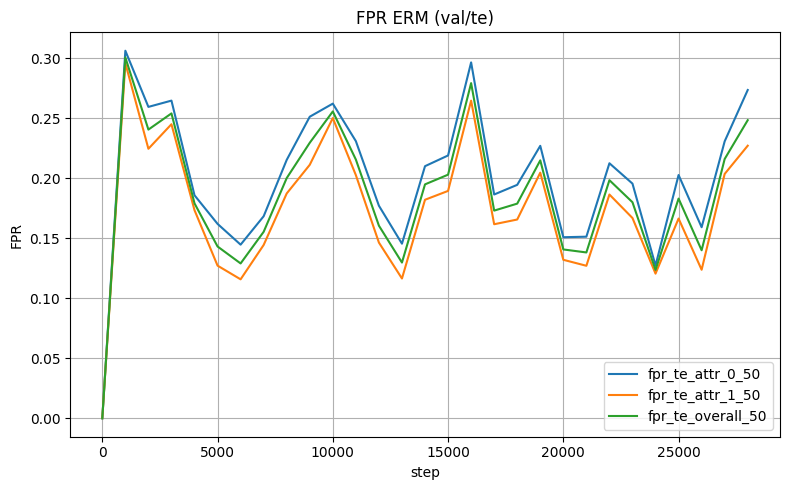

In [53]:
plot_from_df(
    df_te_FPR_erm,
    x="step",
    y=["fpr_te_attr_0_50", "fpr_te_attr_1_50", "fpr_te_overall_50"],
    title="FPR ERM (val/te)",
    ylabel="FPR"
)
